In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#human_data = pd.read_table('/content/FOM.txt')
human_data = pd.read_csv('/content/FOMO.csv',)
human_data.head()

,Sequences,Class
0,TAGATTCTCAGTTCTCTCATTTCTAATTCTCGCAATCTTCCTTGGA...,1
1,ATGGCGAAATTTGCTGCAATTGTTCTGCTAATTCTCGTTGCCTCTG...,1
2,ATGGCCAACCTCCACGCGTTGCGCAGGGAGCAGAGGGCTCAAGGTC...,1
3,ATGGATTTGGCAAACGGTGTGATATCAGCTGAGCTGCTTCATGCTC...,1
4,ATATAATCCAAACACCAAAAACAAAATGGAGAAATTGCTCGTGATC...,1


<ipython-input-4-6d422065f46b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(human_data.corr(), annot = True)


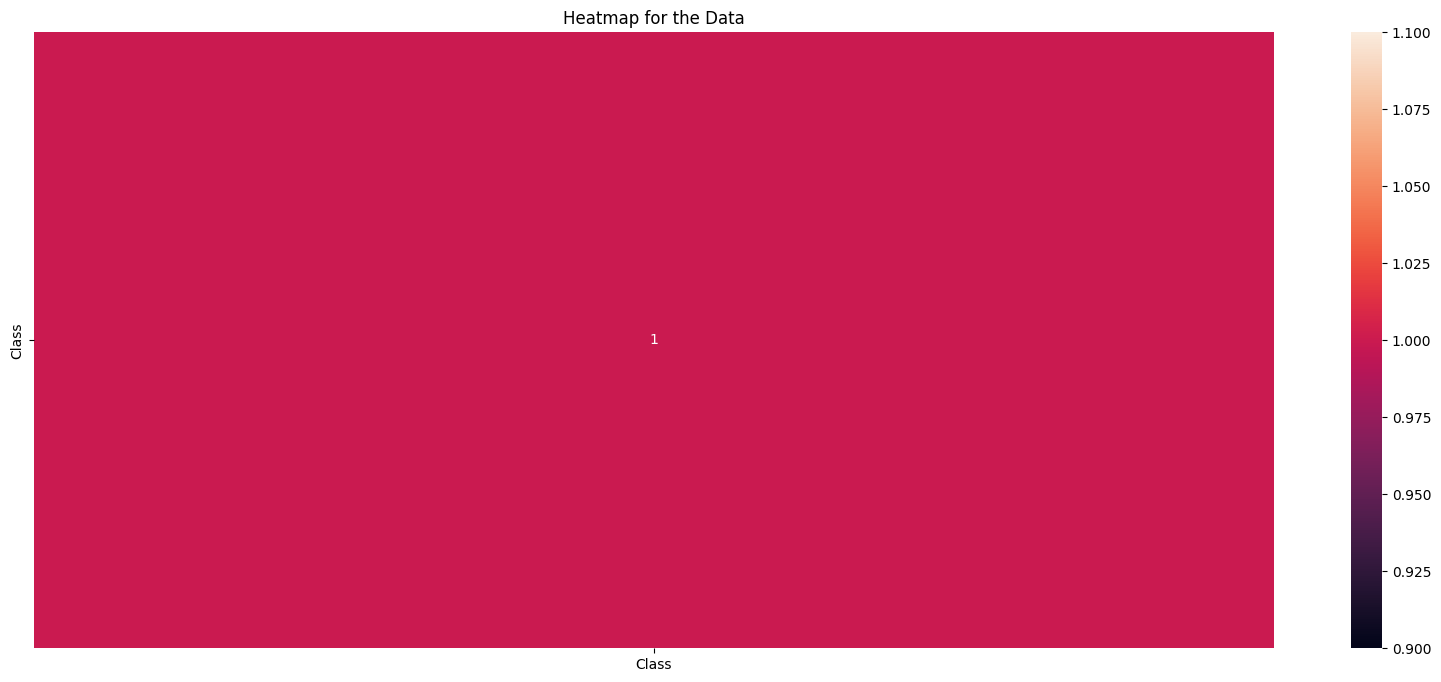

In [4]:
import seaborn as sns
plt.figure(figsize = (20,8))
sns.heatmap(human_data.corr(), annot = True)
plt.title('Heatmap for the Data')
plt.show()

In [5]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(Sequences, size=6):
    return [Sequences[x:x+size].lower() for x in range(len(Sequences) - size + 1)]

In [6]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['Sequences']), axis=1)
human_data = human_data.drop('Sequences', axis=1)

In [7]:
human_data.head()

,Class,words
0,1,"[tagatt, agattc, gattct, attctc, ttctca, tctca..."
1,1,"[atggcg, tggcga, ggcgaa, gcgaaa, cgaaat, gaaat..."
2,1,"[atggcc, tggcca, ggccaa, gccaac, ccaacc, caacc..."
3,1,"[atggat, tggatt, ggattt, gatttg, atttgg, tttgg..."
4,1,"[atataa, tataat, ataatc, taatcc, aatcca, atcca..."


In [8]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values

In [9]:
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [11]:
print(X)

  (0, 12366)	1
  (0, 2454)	1
  (0, 9041)	1
  (0, 4054)	1
  (0, 15290)	1
  (0, 13457)	1
  (0, 7077)	1
  (0, 12866)	1
  (0, 4991)	1
  (0, 3124)	1
  (0, 11788)	1
  (0, 15303)	1
  (0, 13501)	1
  (0, 7242)	1
  (0, 13462)	1
  (0, 7097)	1
  (0, 12949)	1
  (0, 5253)	1
  (0, 4183)	1
  (0, 15816)	1
  (0, 15277)	1
  (0, 13415)	1
  (0, 6910)	1
  (0, 12137)	1
  (0, 1258)	1
  :	:
  (19, 8727)	1
  (19, 3025)	1
  (19, 11363)	1
  (19, 13288)	1
  (19, 6369)	1
  (19, 9627)	1
  (19, 6005)	1
  (19, 7758)	1
  (19, 15701)	1
  (19, 14863)	1
  (19, 11977)	1
  (19, 42)	1
  (19, 41)	1
  (19, 7821)	1
  (19, 18)	1
  (19, 7874)	1
  (19, 8042)	1
  (19, 8139)	1
  (19, 8149)	1
  (19, 1015)	1
  (19, 3116)	1
  (19, 11750)	1
  (19, 15123)	1
  (19, 12865)	1
  (19, 4990)	1


In [12]:
print(X.shape)

(20, 16017)


In [13]:
# Splitting the human dataset into the training set and test set
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_data,test_size = 0.20,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(16, 16017)
(4, 16017)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [16]:
# define scoring method
scoring = 'accuracy'

In [17]:
# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",

         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]
#print(names)

In [18]:
classifiers = [KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
   DecisionTreeClassifier(max_depth=5),
   RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    MultinomialNB(alpha=0.1),

    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]
#print(names)

In [19]:
models = zip(names, classifiers)
#print(names)

jj
Naive Bayes
SVM Linear
Test--  SVM Linear :  0.5

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


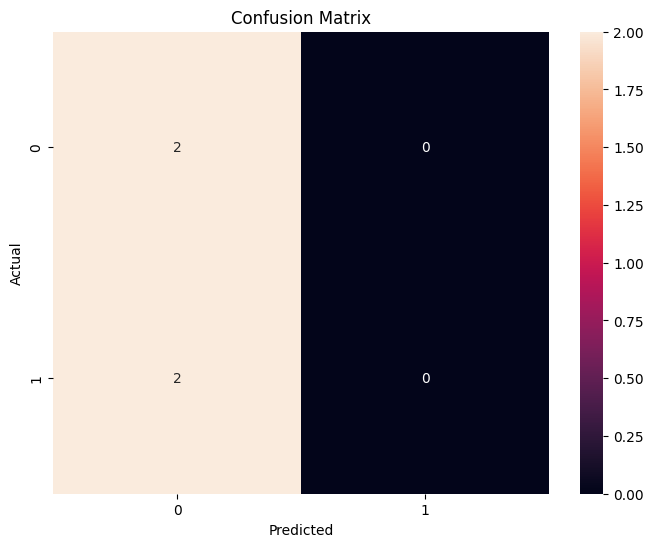

SVM RBF
Test--  SVM RBF :  0.5

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


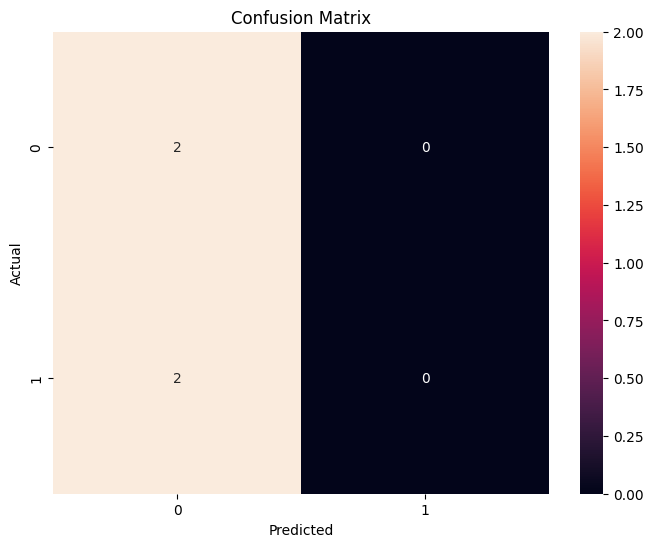

SVM Sigmoid
Test--  SVM Sigmoid :  0.75

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



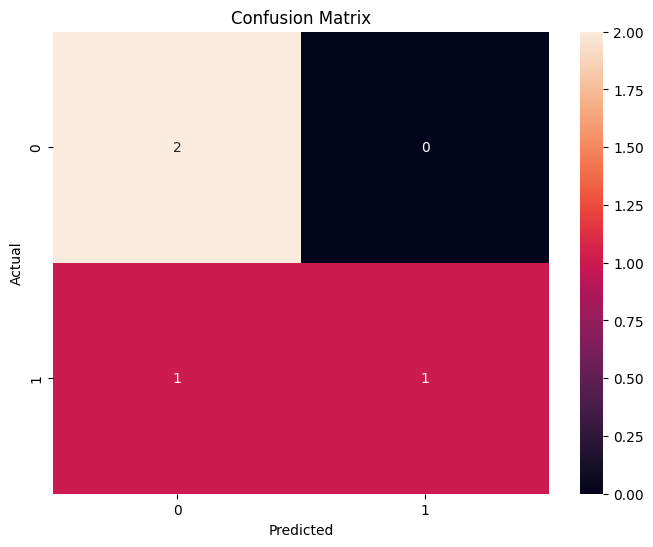

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
results = []
NA = []
print("jj")
print(names)
#X_train = X_train.toarray()
#X_test = X_test.toarray()

for names, model in models:
    print(names)
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    NA.append(names)

    msg = "%s: %f (%f)" % (names, cv_results.mean(), cv_results.std())
    #print(msg)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('Test-- ',names,': ',accuracy_score(y_test, predictions))
    print()
    print(classification_report(y_test, predictions))
    conf_matrix = confusion_matrix(y_test, predictions)
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()